1. Data Preparation <br>
<a href="#Merging">1.1 Merging</a><br>
<a href="#Concatenating">1.2 Concatenating</a><br>
2. Data Transformation <br>
<a href="#Removing Duplicates">2.1 Removing Duplicates</a><br>
<a href="#Mapping">2.2 Mapping</a><br>
<a href="#Discretization">2.3 Discretization</a><br>
<a href="#Permutation">2.4 Permutation</a><br>
3. Data Aggregation <br>
<a href="#Grouping">3.1 Grouping</a><br>

In [1]:
import numpy as np
import pandas as pd

<a id="Mergeing"></a>

### 1.1 Merging
Merge multiple dataframes into one dataframe

In [8]:
frame1 = pd.DataFrame( {'id':['ball','ball','pen','mug','ashtray'], 
                        'color': ['white','red','red','black','green'], 
                        'brand': ['OMG','ABC','ABC','POD','POD']})

In [9]:
frame1

,brand,color,id
0,OMG,white,ball
1,ABC,red,ball
2,ABC,red,pen
3,POD,black,mug
4,POD,green,ashtray


In [10]:
frame2 = pd.DataFrame( {'id':['pencil','pencil','ball','pen'],
                        'brand': ['OMG','POD','ABC','POD']})

In [11]:
frame2

,brand,id
0,OMG,pencil
1,POD,pencil
2,ABC,ball
3,POD,pen


##### merge on one column

In [12]:
pd.merge(frame1, frame2, on="id")

,brand_x,color,id,brand_y
0,OMG,white,ball,ABC
1,ABC,red,ball,ABC
2,ABC,red,pen,POD


##### merge on two columns 

In [13]:
pd.merge(frame1, frame2, on=["brand","id"])

,brand,color,id
0,ABC,red,ball


##### merge on one column but with different names

In [15]:
frame2.columns = ['brand','sid']

In [16]:
frame2

,brand,sid
0,OMG,pencil
1,POD,pencil
2,ABC,ball
3,POD,pen


In [17]:
pd.merge(frame1, frame2, left_on='id', right_on='sid')

,brand_x,color,id,brand_y,sid
0,OMG,white,ball,ABC,ball
1,ABC,red,ball,ABC,ball
2,ABC,red,pen,POD,pen


By default, the merge() function performs an inner join; the keys in the result are the result of an intersection.
##### outter, left and right merging

In [19]:
frame2.columns = ['brand','id']
pd.merge(frame1,frame2,on='id',how='outer')

,brand_x,color,id,brand_y
0,OMG,white,ball,ABC
1,ABC,red,ball,ABC
2,ABC,red,pen,POD
3,POD,black,mug,NaN
4,POD,green,ashtray,NaN
5,NaN,NaN,pencil,OMG
6,NaN,NaN,pencil,POD


##### mering on indexes

In [22]:
pd.merge(frame1,frame2,right_index=True, left_index=True)

,brand_x,color,id_x,brand_y,id_y
0,OMG,white,ball,OMG,pencil
1,ABC,red,ball,POD,pencil
2,ABC,red,pen,ABC,ball
3,POD,black,mug,POD,pen


<a id="Concatenating"></a>

### 1.2 Concatenating
Append one dataframe horizontally or vertically to another dataframe

In [ ]:
# numpy concatenate arrays
# np.concatenate([array1,array2],axis=1): concatenate on columns
# np.concatenate([array1,array2],axis=1): concatenate on rows

In [27]:
frame1 = pd.DataFrame(np.random.rand(9).reshape(3,3), index=[1,2,3], columns=['A','B','C'])
frame1

,A,B,C
1,0.462776,0.783066,0.966605
2,0.521013,0.269213,0.265838
3,0.115497,0.389472,0.523958


In [28]:
frame2 = pd.DataFrame(np.random.rand(9).reshape(3,3), index=[4,5,6], columns=['A','B','C'])
frame2

,A,B,C
4,0.204638,0.319874,0.926688
5,0.564460,0.580396,0.499887
6,0.672400,0.308721,0.132048


In [29]:
# by row
pd.concat([frame1, frame2])

,A,B,C
1,0.462776,0.783066,0.966605
2,0.521013,0.269213,0.265838
3,0.115497,0.389472,0.523958
4,0.204638,0.319874,0.926688
5,0.564460,0.580396,0.499887
6,0.672400,0.308721,0.132048


In [30]:
# by column
pd.concat([frame1, frame2], axis=1)

,A,B,C,A,B,C
1,0.462776,0.783066,0.966605,NaN,NaN,NaN
2,0.521013,0.269213,0.265838,NaN,NaN,NaN
3,0.115497,0.389472,0.523958,NaN,NaN,NaN
4,NaN,NaN,NaN,0.204638,0.319874,0.926688
5,NaN,NaN,NaN,0.564460,0.580396,0.499887
6,NaN,NaN,NaN,0.672400,0.308721,0.132048


<a id="Removing Duplicates"></a>

### 2.1 Removing Duplicates

In [33]:
dframe = pd.DataFrame({ 'color': ['white','white','red','red','white'], 
                       'value': [2,1,3,3,2]})
dframe

,color,value
0,white,2
1,white,1
2,red,3
3,red,3
4,white,2


In [35]:
# detect duplicate rows
dframe.duplicated()

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [36]:
# extract duplicate rows
dframe[dframe.duplicated()]

,color,value
3,red,3
4,white,2


In [39]:
# drop duplicate rows
dframe.drop_duplicates()

,color,value
0,white,2
1,white,1
2,red,3


<a id="Mapping"></a>

### 2.2 Mapping

map: matches between two different values. 

• replace()—Replaces values 

In [41]:
# replace with a dictionary
frame = pd.DataFrame({ 'item':['ball','mug','pen','pencil','ashtray'], 
                      'color':['white','rosso','verde','black','yellow'], 
                      'price':[5.56,4.20,1.30,0.56,2.75]})
frame

,color,item,price
0,white,ball,5.56
1,rosso,mug,4.20
2,verde,pen,1.30
3,black,pencil,0.56
4,yellow,ashtray,2.75


In [42]:
newcolors = { 'rosso': 'red', 'verde': 'green'}

In [43]:
# replace rosso and verde
frame.replace(newcolors)

,color,item,price
0,white,ball,5.56
1,red,mug,4.20
2,green,pen,1.30
3,black,pencil,0.56
4,yellow,ashtray,2.75


In [44]:
# replace in series
ser = pd.Series([1,3,np.nan,4,6,np.nan,3])
ser

0    1.0
1    3.0
2    NaN
3    4.0
4    6.0
5    NaN
6    3.0
dtype: float64

In [45]:
# replace np.nan with 0
ser.replace(np.nan, 0)

0    1.0
1    3.0
2    0.0
3    4.0
4    6.0
5    0.0
6    3.0
dtype: float64

• map()—Creates a new column

In [46]:
frame = pd.DataFrame({ 'item':['ball','mug','pen','pencil','ashtray'],
                      'color':['white','red','green','black','yellow']})
frame

,color,item
0,white,ball
1,red,mug
2,green,pen
3,black,pencil
4,yellow,ashtray


In [48]:
prices = {'ball' : 5.56, 
          'mug' : 4.20, 
          'bottle' : 1.30,
          'scissors' : 3.41,
          'pen' : 1.30, 
          'pencil' : 0.56,
          'ashtray' : 2.75}

In [49]:
# add a new column via mapping
frame['price'] = frame['item'].map(prices)

In [50]:
frame

,color,item,price
0,white,ball,5.56
1,red,mug,4.20
2,green,pen,1.30
3,black,pencil,0.56
4,yellow,ashtray,2.75


• rename()—Replaces the index values

In [51]:
reindex = { 0: 'first', 
           1: 'second', 
           2: 'third', 
           3: 'fourth', 
           4: 'fifth'}
frame.rename(reindex)

,color,item,price
first,white,ball,5.56
second,red,mug,4.20
third,green,pen,1.30
fourth,black,pencil,0.56
fifth,yellow,ashtray,2.75


add the *columns=recolumn* option to rename column names

<a id="Discretization"></a>

### 2.3 Discretization and Binning

Discretization: divide data into discrete categories

In [52]:
# divide the result into 4 categories
results = [12,34,67,55,28,90,99,12,3,56,74,44,87,23,49,89,87]
bins = [0,25,50,75,100]
cat = pd.cut(results, bins)
cat

[(0, 25], (25, 50], (50, 75], (50, 75], (25, 50], ..., (75, 100], (0, 25], (25, 50], (75, 100], (75, 100]]
Length: 17
Categories (4, interval[int64]): [(0, 25] < (25, 50] < (50, 75] < (75, 100]]

In [53]:
pd.value_counts(cat)

(75, 100]    5
(50, 75]     4
(25, 50]     4
(0, 25]      4
dtype: int64

<a id="Permutation"></a>

### 2.4 Permutation

Reorder the dataframe by rows

In [54]:
nframe = pd.DataFrame(np.arange(25).reshape(5,5))
nframe

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [58]:
# generate a random array from 0 to n
new_order = np.random.permutation(5)
new_order

array([3, 4, 2, 0, 1])

In [65]:
# reorder the dataframe
nframe.take(new_order)

,0,1,2,3,4
3,15,16,17,18,19
4,20,21,22,23,24
2,10,11,12,13,14
0,0,1,2,3,4
1,5,6,7,8,9


### Useful String Manipulation

In [95]:
# split and strip
text = '16 Bolton Avenue , Boston'
tokens = [x.strip() for x in text.split()]
tokens

['16', 'Bolton', 'Avenue', ',', 'Boston']

In [99]:
# join
token = " ". join(tokens)
token

'16 Bolton Avenue , Boston'

In [100]:
# find: return the index position of first appearance
token.find('Boston')

19

In [101]:
# if no exist, returns -1
token.find("New York")

-1

<a id="Grouping"></a>

### 3.1 Grouping

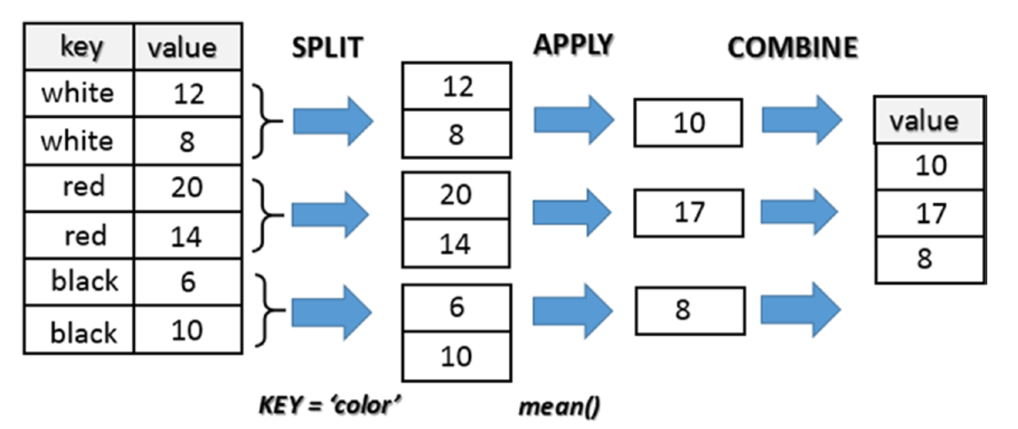